<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/LAB03_Pr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size

from sklearn import tree
from sklearn.datasets import load_iris
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Descarga y lectura de datos

In [88]:
# Lectura de la base de datos
filename = 'lluvias.csv'
data = pd.read_csv(filename, sep = ',')

###Revisión y limpieza de datos
Observamos que tenemos un dataset con un total de 25551 registros y solo existen datos NaN en 3 de ellos, es decir, está bastante completo.

In [89]:
# Revisión de los datos
print(data.shape)

data.info()
data.head(10)

(25551, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


Decidimos eliminar los Nan ya que son solo 3 y no será significativo para el estudio que vamos a realizar. Y quitamos los duplicados, que como podemos observar, en este caso no los hay.

In [90]:
# Elimino los Nan.
data = data.dropna()

# Quitamos los duplicados
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


Procedemos a crear los diagramas de caja de los 3 datos que tenemos para interpretar si los datos están tomados de manera correcta.

Comenzamos con el de las precipitaciones para ver los Outliers.

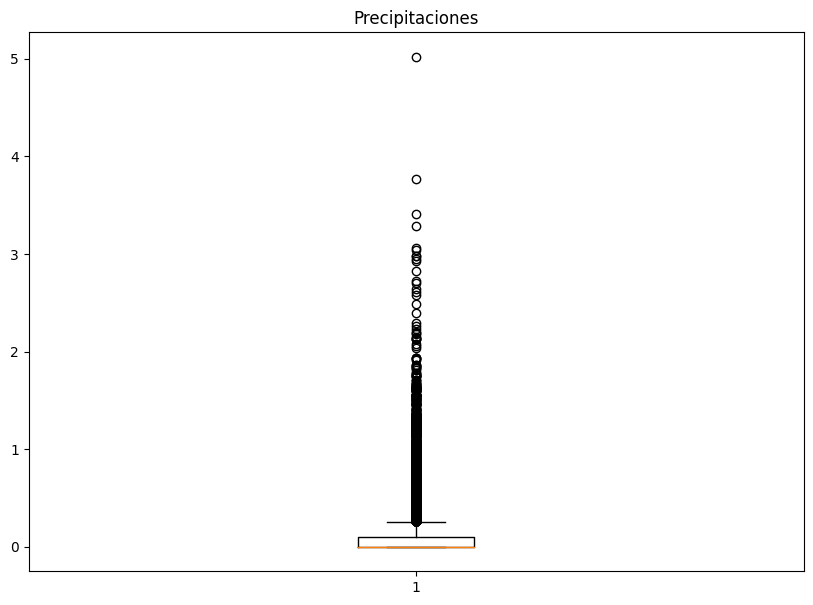

In [91]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data['PRCP'])
ax.set_title('Precipitaciones')

# Dibujar gráfico
plt.show()

Tras buscar información de los datos de precipitaciones en Madrid en los últimos años, encontramos la siguiente gráfica.

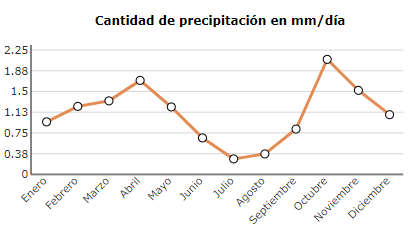

Donde un milímetro de agua equivale a vaciar un litro de líquido en un espacio de un metro cuadrado. Esta unidad que suena a medida de longitud, es la utilizada para medir la precipitación.

Por lo que eliminaremos todos los registros cuyo valor de precipitación sea mayor que 2.25.

In [92]:
data.drop(data[(data['PRCP'] > 2.25)].index, inplace=True)

Al observar el rango de los datos de la columna de las temperaturas, nos damos cuenta de que el valor máximo de la temperatura es muy alto, entendiendo que los registros están en grados Fahrenheit. 

Realizamos la conversión de todas las temperaturas a grados Celsius, con la fórmula de conversión.

In [93]:
temp_max = data["TMAX"].max()

print('La temperatura máxima encontrada es', temp_max,'entendemos que estamos en Fº y queremos trabajar en Cº.')

La temperatura máxima encontrada es 103 entendemos que estamos en Fº y queremos trabajar en Cº.


In [94]:
data["TMIN"] = (data.TMIN - 32)*(5/9)

data["TMAX"] = (data.TMAX - 32)*(5/9)

temp_max = data["TMAX"].max().round(2)

temp_min = data["TMIN"].min().round(2)

print('La temperatura máxima en grados Celsius es', temp_max,'Cº.')

La temperatura máxima en grados Celsius es 39.44 Cº.


Imprimimos los primeros 40 registros para comprobar que se hayan modificado correctamente.

In [95]:
data.head(40)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,10.555556,5.555556,True
1,1948-01-02,0.59,7.222222,2.222222,True
2,1948-01-03,0.42,7.222222,1.666667,True
3,1948-01-04,0.31,7.222222,1.111111,True
4,1948-01-05,0.17,7.222222,0.000000,True
5,1948-01-06,0.44,8.888889,3.888889,True
6,1948-01-07,0.41,10.000000,4.444444,True
7,1948-01-08,0.04,8.888889,1.666667,True
8,1948-01-09,0.12,10.000000,-0.555556,True
9,1948-01-10,0.74,6.111111,1.111111,True


Consideramos al observar el diagrama de caja de las temperaturas máximas, que los Outliers no se deben eliminar, pues son datos que pueden ser perfectamente correctos.

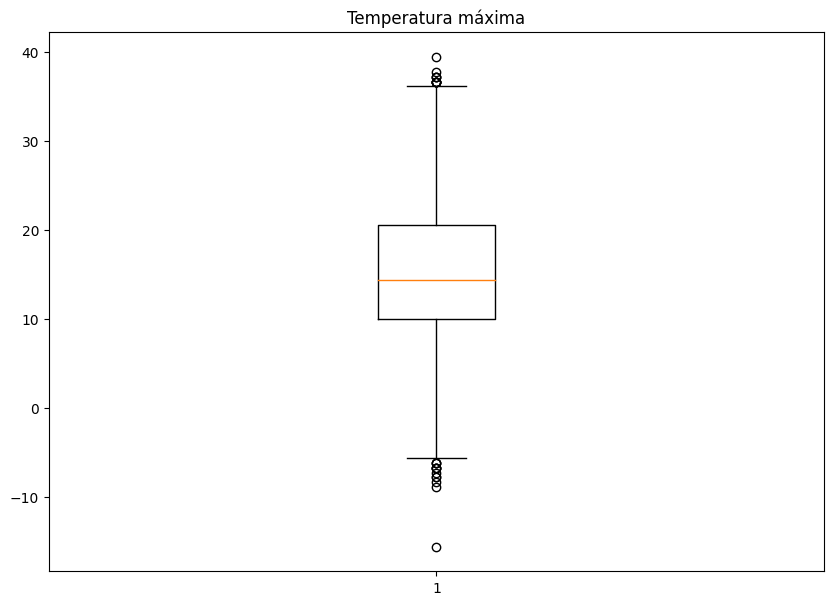

In [96]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data['TMAX'])
ax.set_title('Temperatura máxima')

# Dibujar gráfico
plt.show()

Al igual que en el diagrama anterior, nos quedaremos con todos los registros, pues los Outliers pueden considerarse datos correctos.

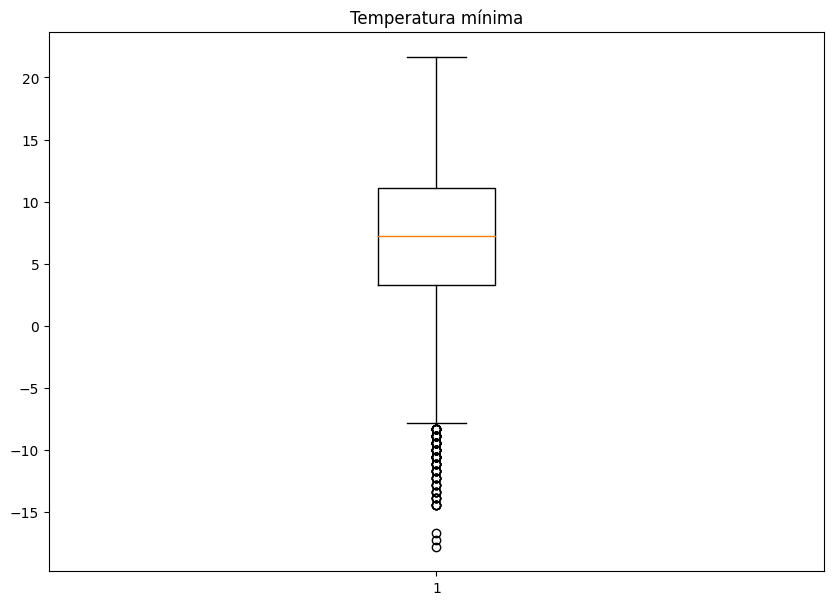

In [97]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data['TMIN'])
ax.set_title('Temperatura mínima')

# Dibujar gráfico
plt.show()

Categorizamos las columnas 'TMIN', 'TMAX' y 'PRCP' tal y como se pide en el enunciado del ejercicio.

'TMIN' tomará las etiquetas 'Baja', 'Media' y 'Alta', en función de los rangos de temperatura < 10, 10 >= temeperatura <= 20 y temperatura > 20.

In [98]:
conditions = [
          (data['TMIN'] < 10),
          ((data['TMIN'] >= 10) & (data['TMIN'] <= 20)),
          (data['TMIN'] > 20)
             ]

#define results
results = ['Baja', 'Media', 'Alta']

#create new column based on conditions in column1 and column2
data['TMIN'] = np.select(conditions, results)

'TMAX' se categoriza igual que 'TMIN'.

In [99]:
conditions = [
          (data['TMAX'] < 10),
          ((data['TMAX'] >= 10) & (data['TMAX'] <= 20)),
          (data['TMAX'] > 20)
             ]

#define results
results = ['Baja', 'Media', 'Alta']

#create new column based on conditions in column1 and column2
data['TMAX'] = np.select(conditions, results)

In [100]:
# Vemos cuantos registros de cada etiqueta tiene TMIN

data.value_counts(data['TMIN'])

TMIN
Baja     16986
Media     8537
Alta         5
dtype: int64

In [101]:
conditions = [
          (data['PRCP'] < 1),
          ((data['PRCP'] >= 1) & (data['PRCP'] <= 2)),
          (data['PRCP'] > 2)
             ]

#define results
results = ['Poco', 'Normal', 'Mucho']

#create new column based on conditions in column1 and column2
data['PRCP'] = np.select(conditions, results)

Vemos los primeros 20 registros para comprobar que las tres columnas han sido correctamente parametrizadas.

In [102]:
data.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,Poco,Media,Baja,True
1,1948-01-02,Poco,Baja,Baja,True
2,1948-01-03,Poco,Baja,Baja,True
3,1948-01-04,Poco,Baja,Baja,True
4,1948-01-05,Poco,Baja,Baja,True
5,1948-01-06,Poco,Baja,Baja,True
6,1948-01-07,Poco,Media,Baja,True
7,1948-01-08,Poco,Baja,Baja,True
8,1948-01-09,Poco,Media,Baja,True
9,1948-01-10,Poco,Baja,Baja,True


#Clasificación basada en redes Bayesianas

Contamos cuantos registros tienen como clasificación True y cuantos False y lo guardamos en variables, aunque luego solo utilizaremos las de True.

Creamos un dataset de entrenamiento que contiene el 98% de los registros del dataset original y otro de test que contiene el 2% restante para poder calcular el error y la precisión al final.

Hemos decidido coger estos porcentajes para que la compilación de la función no tarde mucho tiempo.

In [103]:
data_train, data_test = train_test_split(data, random_state=104, test_size=0.02, shuffle=True)

# Guardamos la frecuencia del valor 'True' y 'False' en variables
total_rain_true  = data_train['RAIN'].value_counts()[True]
total_rain_false = data_train['RAIN'].value_counts()[False]

# Total de registros
total_registros = total_rain_true + total_rain_false

# P(True)
prob_true = total_rain_true/total_registros

Creamos un nuevo dataset que contiene solo los registros clasificados como 'True', para poder sacar el resto de frecuencias.

In [104]:
data_rain_true = data_train.query('RAIN != @False')
data_rain_true

,DATE,PRCP,TMAX,TMIN,RAIN
2186,1953-12-26,Poco,Baja,Baja,True
16822,1994-01-21,Poco,Media,Baja,True
10237,1976-01-11,Poco,Baja,Baja,True
8941,1972-06-24,Poco,Media,Media,True
9428,1973-10-24,Poco,Media,Baja,True
...,...,...,...,...,...
16933,1994-05-12,Poco,Media,Baja,True
7900,1969-08-18,Poco,Alta,Media,True
21652,2007-04-13,Poco,Media,Baja,True
25253,2017-02-20,Poco,Baja,Baja,True


### Creación de las funciones


#### Función Clasificación Bayesiana
Creamos una función llamada clasificacion_bayesiana, que recopilará cada una de las probabilidades necesarias para poder finalmente calcular la probabilidad de que llueva, es decir, 'RAIN' == True del registro dado.

La función, devuelve dicha probabilidad.

En caso de que el registro no se encuentre en la base de datos de entrenamiento, decidimos que la probabilidad de lluvia sea cero, pues no podemos predecirla, pues devolvería infinito.

In [105]:
# Iteramos sobre las filas del dataframe nuevo con un bucle for
def clasificacion_bayesiana(registro, data_set, probabilidad_lluvia):

  probabilidad_PRCP = data_set['PRCP'].value_counts()[registro['PRCP']]/total_rain_true

 # Probabilidades de 'RAIN == True' en función de la TMAX.
  probabilidad_TMAX = data_set['TMAX'].value_counts()[registro['TMAX']]/total_rain_true

  # Probabilidades de 'RAIN == True' en función de la TMIN.
  if registro['TMIN'] == 'Alta':
    probabilidad_TMIN = 0
  else:
    probabilidad_TMIN = data_set['TMIN'].value_counts()[registro['TMIN']]/total_rain_true

  # Definimos la probabilidad del registro
  probabilidad_registro = 0

  registro = registro.to_frame().T.reset_index()
  columnas_comparar = ['PRCP', 'TMAX','TMIN']

  # Seleccionamos solo las columnas de interés del DataFrame original
  seleccion = data_train.loc[:, columnas_comparar]
  sel2 = registro.loc[:,columnas_comparar]

  # Crea el nuevo DataFrame y registro con solo las columnas seleccionadas
  nuevo_df = pd.DataFrame(seleccion)
  nuevo_registro = pd.DataFrame(sel2)
  
  # Frecuencia del registro en el dataframe de entrenamiento
  prob = len(nuevo_df[nuevo_df['PRCP'].apply(lambda x: x in nuevo_registro['PRCP'][0]) 
           & nuevo_df['TMAX'].apply(lambda x: x in nuevo_registro['TMAX'][0])
           & nuevo_df['TMIN'].apply(lambda x: x in nuevo_registro['TMIN'][0])])

  # Probabilidad del registro
  probabilidad_registro = prob/len(data_train)

  # Contemplamos que el registro no se haya dado NUNCA
  if probabilidad_registro == 0:
    print('\nNo hay registros con esta configuración en el dataframe de entrenamiento.')
    probabilidad_lluvia.append(0)
  else:
    probabilidad_lluvia.append((probabilidad_PRCP*probabilidad_TMAX*probabilidad_TMIN*prob_true)/probabilidad_registro)
  

  return probabilidad_lluvia

####Función de error
Devuelve el error del dataset completo pasado, tomando True como 1 y False como 0.
El error viene dado por la suma de los valores absoluto de la resta del valor real (0 ó 1) y el valor predicho (la probabilidad devuelta), entre el número de registros que contiene dicho data set.

In [106]:
def f_errores(errores, registro, probabilidad_lluvia):

  if registro['RAIN'] == True:
    errores.append(abs(1-probabilidad_lluvia))
  else:
    errores.append(abs(0-probabilidad_lluvia))

  suma = 0
  for valor in errores:
    suma += valor
  
  error = suma/len(errores)
  return error

#### Función Tasa de Acierto
Esta función nos devuelve la precisión del modelo, a partir de la tasa de acierto del mismo.

Se saca dividiendo los aciertos entre el total de registros predichos.

In [107]:
def t_aciertos(aciertos, registro, punto_corte,probabilidad_lluvia):

  if registro['RAIN'] == True:
    if probabilidad_lluvia > punto_corte:
      aciertos.append(1)
    else:
      aciertos.append(0)
  else:
    if probabilidad_lluvia <= punto_corte:
      aciertos.append(1)
    else:
      aciertos.append(0)
  suma = 0
  for valor in aciertos:
    suma += valor
  
  tasa_aciertos = suma/len(aciertos)
  return tasa_aciertos

###Probamos como clasifica según las probabilidades generadas

Creamos un dataset nuevo con los registros de los 3 días posteriores a los que ya tenemos en el dataset inicial, con sus correspondientes datos de Precipitaciones, Temperatura máxima y Temperatura mínima. Que crearemos manualmente.

Se corresponden con los días '15-12-2017', '16-12-2017' y '17-12-2017'.

In [108]:
# Creamos un dataframe con los nuevos registros
registros_nuevos = pd.DataFrame({'DATE': ['15-12-2017', '16-12-2017', '17-12-2017'], 'PRCP': ['Poco', 'Mucho', 'Normal'], 'TMAX': ['Media', 'Baja', 'Media'], 'TMIN': ['Baja', 'Media', 'Baja'], 'RAIN': [False, True, True]})

registros_nuevos.dtypes

DATE    object
PRCP    object
TMAX    object
TMIN    object
RAIN      bool
dtype: object

Llamamos a la función de Clasificación Bayesiana para que nos devuelva las 3 probabilidades de los nuevos registros.

In [109]:
probabilidad = []
for i in range(len(registros_nuevos)):
  probabilidad = clasificacion_bayesiana(registros_nuevos.iloc[i], data_rain_true,probabilidad)
  print('\nLa probabilidad de lluvia del día', registros_nuevos.iloc[i]['DATE'],' es de', probabilidad[i],'\n')

print(probabilidad)


La probabilidad de lluvia del día 15-12-2017  es de 0.5348709866397553 


No hay registros con esta configuración en el dataframe de entrenamiento.

La probabilidad de lluvia del día 16-12-2017  es de 0 


La probabilidad de lluvia del día 17-12-2017  es de 0.8693846112382244 

[0.5348709866397553, 0, 0.8693846112382244]


Llamamos a la función de tasa de acierto para obtener cuanto de preciso es nuestro modelo.

In [110]:
aciertos = []

for i in range(len(registros_nuevos)):
  tasa_acierto = t_aciertos(aciertos,registros_nuevos.iloc[i],0.5, probabilidad[i])
print('\nLa tasa de acierto al calcular la probabilidad de lluvia de los registros nuevos es de', tasa_acierto,'.\n')


La tasa de acierto al calcular la probabilidad de lluvia de los registros nuevos es de 0.3333333333333333 .



Llamamos a la función Errores para obtener el función de los registros nuevos.

In [111]:
errores = []

for i in range(len(registros_nuevos)):
  error = f_errores(errores,registros_nuevos.iloc[i], probabilidad[i])
print('\nEl error al calcular la probabilidad de lluvia de los registros nuevos es de', error,'.\n')


El error al calcular la probabilidad de lluvia de los registros nuevos es de 0.5551621251338437 .



### Cálculo del error

Tomando el dataframe de validación podremos sacar cuál es la precisión y el error del modelo dado un número mayor de registros.

In [112]:
len(data_test)

511

En concreto 511 registros.

In [114]:
prob_test = []
for i in range(len(data_test)):
  probabilidad_test = clasificacion_bayesiana(data_test.iloc[i], data_rain_true, prob_test)
print(probabilidad_test)

[0.5348709866397553, 0.02249151541194062, 0.44943865853806825, 0.44943865853806825, 0.4570975493009893, 0.02249151541194062, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.5348709866397553, 0.5348709866397553, 0.4570975493009893, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.4733740540781393, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.4733740540781393, 0.02249151541194062, 0.02249151541194062, 0.5348709866397553, 0.44943865853806825, 0.44943865853806825, 0.4733740540781393, 0.02249151541194062, 0.5348709866397553, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.4733740540781393, 0.44943865853806825, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.4570975493009893, 0.02249151541194062, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.44943865853806825, 0.5348709866397553, 0.4733740540781393, 0.

Aumenta la precisión y disminuye el error al ejecutarlo con los datos de test.

In [117]:
aciertos_test = []

for i in range(len(data_test)):
  tasa_acierto_test = t_aciertos(aciertos_test,data_test.iloc[i],0.5, probabilidad_test[i])
print('\nLa tasa de acierto al calcular la probabilidad de lluvia del data set de validación es de', tasa_acierto_test,'.\n')


La tasa de acierto al calcular la probabilidad de lluvia del data set de validación es de 0.5616438356164384 .



In [120]:
errores_test = []

for i in range(len(data_test)):
  error_test = f_errores(errores_test,data_test.iloc[i], probabilidad_test[i])
print('\nEl error al calcular la probabilidad de lluvia del data set de validación es de', error_test,'.\n')


El error al calcular la probabilidad de lluvia del data set de validación es de 0.40337958357947723 .



#### Variaciones para mejorar el modelo
Procedemos a disminuir el punto de corte un 0.1, es decir,a 0.4, buscando una mejor de precisión.

Conseguimos un 0.02 más de precisión, aunque el error absoluto es el mismo.

In [128]:
prob_test_v = []
tasa_aciertos_v = []
for i in range(len(data_test)):
  probabilidad_test_v = clasificacion_bayesiana(data_test.iloc[i], data_rain_true, prob_test_v)
print(probabilidad_test_v)

[0.5348709866397553, 0.02249151541194062, 0.44943865853806825, 0.44943865853806825, 0.4570975493009893, 0.02249151541194062, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.5348709866397553, 0.5348709866397553, 0.4570975493009893, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.4733740540781393, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.4733740540781393, 0.02249151541194062, 0.02249151541194062, 0.5348709866397553, 0.44943865853806825, 0.44943865853806825, 0.4733740540781393, 0.02249151541194062, 0.5348709866397553, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.4733740540781393, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.4733740540781393, 0.44943865853806825, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.4570975493009893, 0.02249151541194062, 0.5348709866397553, 0.5348709866397553, 0.02249151541194062, 0.5348709866397553, 0.44943865853806825, 0.5348709866397553, 0.4733740540781393, 0.

In [132]:
aciertos_test_v = []

for i in range(len(data_test)):
  tasa_acierto_test_v = t_aciertos(aciertos_test_v,data_test.iloc[i],0.4, probabilidad_test_v[i])
print(tasa_acierto_test_v)

0.5831702544031311


In [134]:
errores_test_v = []

for i in range(len(data_test)):
  error_test_v = f_errores(errores_test_v,data_test.iloc[i], probabilidad_test_v[i])
print(error_test_v)

0.40337958357947723


###Conclusiones

Todos los registros cuya precipitación tenga el valor 'Mucho' seclasificarán de manera errónea siempre, pues hay solo 32 registros en total. Y en el dataset de entrenamiento tan solo 11, por lo que la probabilidad de que haya cero registros idénticos al dado es muy baja y, sin embargo, todos los registros con este valor son días que sí llovieron.

In [129]:
data_rain_true.value_counts(data_rain_true['PRCP'])

PRCP
Poco      10354
Normal      315
Mucho        11
dtype: int64

La clasificación Bayesiana es completamente dependiente del dataset que se coja de 'entrenamiento', es decir, del que se cuentan las frecuencias para sacar las probabilidades.

No es muy fiable, aunque hemos conseguido una precisión de casi el 60%.

Creemos que a la hora de predecir si va a llover un día, es necesario tener otro tipo de datos o al menos un dataset que contenga registros más variados, para evitar algunos errores como el descrito previamente 